In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# install necessary packages which are not available in colab env
!pip install torchmetrics

CODE BLOCK: 1

In [3]:
# import neccessary packages for training the mnist model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchmetrics import Accuracy

In [4]:
# import custom modules
%cd '/content/gdrive/MyDrive/ERA_V2/session5/'
import model
import utils

/content/gdrive/MyDrive/ERA_V2/session5


CODE BLOCK: 2

In [5]:
# CHECK CUDA AVAILABILITY
print("CUDA Available?", utils.check_cuda_availability())

CUDA Available? True


CODE BLOCK: 3

In [6]:
# Train data transformations
train_transforms = utils.create_train_transforms()

# Test data transformations
test_transforms = utils.create_test_transforms()

CODE BLOCK: 4

In [7]:
# download the dataset from pytorch library and split the training and test data
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [8]:
# set batch_size and load the test and train dataset from the torch utils
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

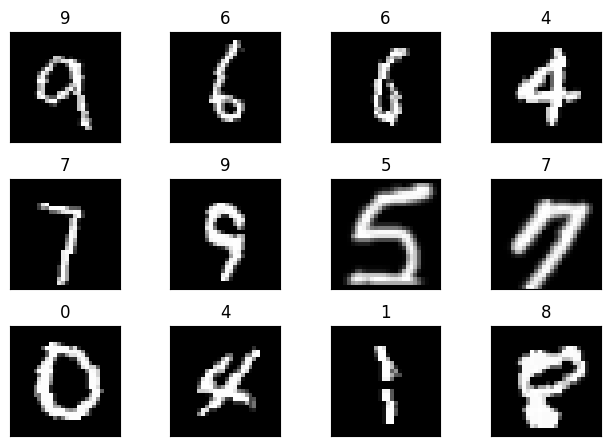

In [9]:
# plot some of the train images for validation
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [10]:
# Model summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
# set the device to run the program in cpu or gpu
device = torch.device("cuda" if use_cuda else "cpu")
# load neural network model from custom module (model)
# Main method of the program
Model = model.Net().to(device)
summary(Model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8

In [11]:
# used to minimize an error function by tuning the learnable parameters ex: weights & bias
optimizer = utils.set_optimizer(Model)
# Gradually decreasing the learning rate over time during the training of a deep learning model to each the minimum loss value
scheduler = utils.set_lr(optimizer)
# Given an input and a target, they compute a gradient according to a given loss function
criterion = F.nll_loss # Negative Log-Likelihood (NLL) Loss is used to optimize models that predict probabilities for different classes
# set num_epochs how many times to repeat the training with the complete dataset
num_epochs = 10

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(Model, device, train_loader, optimizer, criterion)
  utils.test(Model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0645 Batch_id=468 Accuracy=81.76: 100%|██████████| 469/469 [00:36<00:00, 12.70it/s]


Test set: Average loss: 0.0650, Accuracy: 9803/10000 (98.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0246 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:24<00:00, 18.82it/s]


Test set: Average loss: 0.0378, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0572 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:25<00:00, 18.74it/s]


Test set: Average loss: 0.0353, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0455 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:25<00:00, 18.51it/s]


Test set: Average loss: 0.0230, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0231 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:25<00:00, 18.56it/s]


Test set: Average loss: 0.0257, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0514 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:24<00:00, 18.81it/s]


Test set: Average loss: 0.0245, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0320 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:24<00:00, 19.02it/s]


Test set: Average loss: 0.0202, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0186 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:24<00:00, 19.38it/s]


Test set: Average loss: 0.0204, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0306 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:25<00:00, 18.74it/s]


Test set: Average loss: 0.0239, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0069 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:25<00:00, 18.61it/s]


Test set: Average loss: 0.0206, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 9

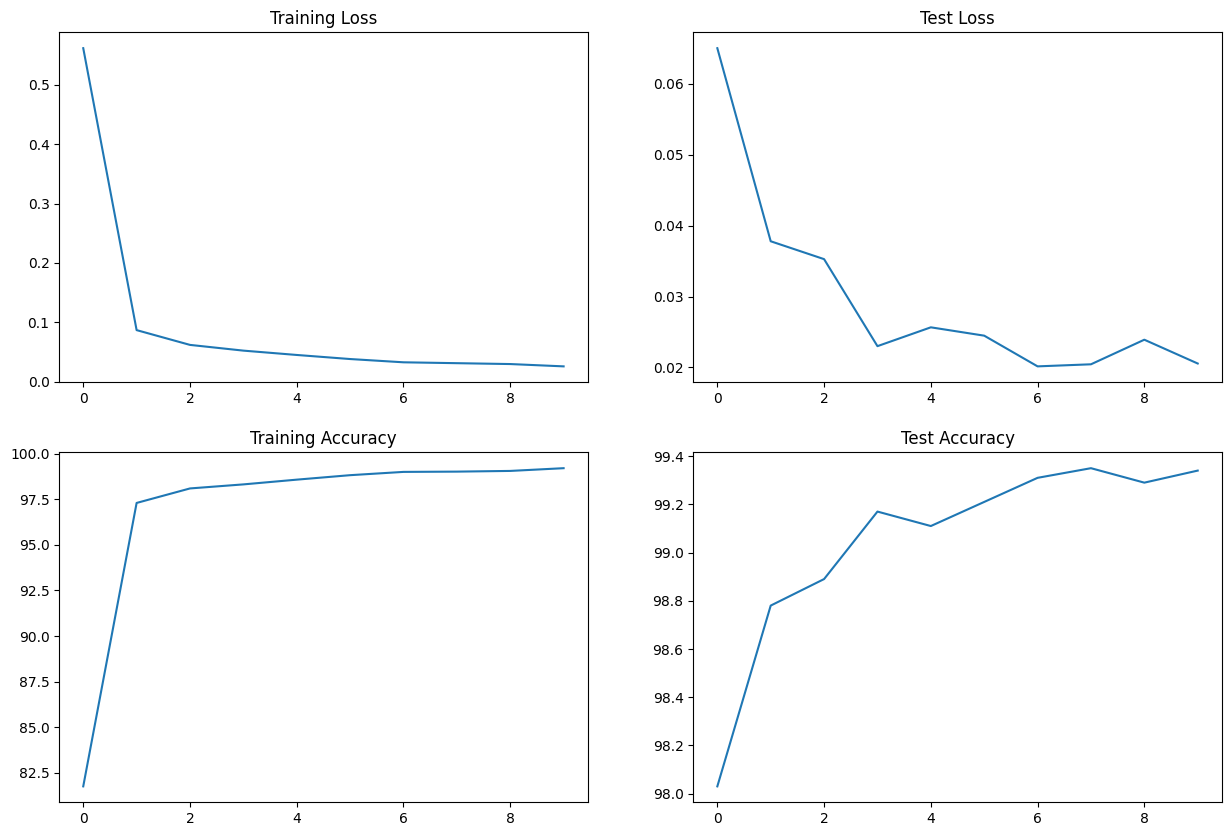

In [12]:
# plot the training and testing accuracy and loss using matplotlib
utils.plot_metrics()